In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


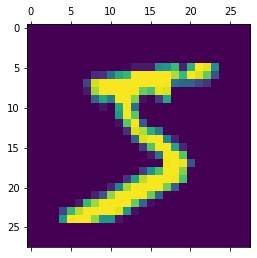

In [6]:
plt.matshow(x_train[0])

In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 1.2789 - accuracy: 0.6819
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5422 - accuracy: 0.8618
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4104 - accuracy: 0.8905
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3592 - accuracy: 0.9004
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3310 - accuracy: 0.9061
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3122 - accuracy: 0.9112
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2978 - accuracy: 0.9151
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2860 - accuracy: 0.9186
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2757 - accuracy: 0.9209
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.26

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.1192 - accuracy: 0.9619


[0.11916747689247131, 0.961899995803833]

In [16]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]

In [17]:

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    1,    1,    3,    4,    1,    2,    1],
       [   0, 1124,    3,    2,    0,    0,    2,    0,    4,    0],
       [   4,    3, 1008,    3,    1,    0,    2,    6,    5,    0],
       [   0,    1,    6,  980,    0,    6,    1,    7,    3,    6],
       [   1,    0,    2,    0,  965,    0,    4,    1,    2,    7],
       [   2,    0,    0,    5,    1,  878,    2,    1,    2,    1],
       [   3,    1,    1,    0,   11,    7,  934,    0,    1,    0],
       [   1,    4,    7,    3,    3,    0,    0, 1002,    4,    4],
       [   4,    0,    2,    5,    4,    5,    2,    4,  945,    3],
       [   0,    2,    0,    2,    7,    7,    1,    6,    2,  982]])>

Text(69.0, 0.5, 'actual')

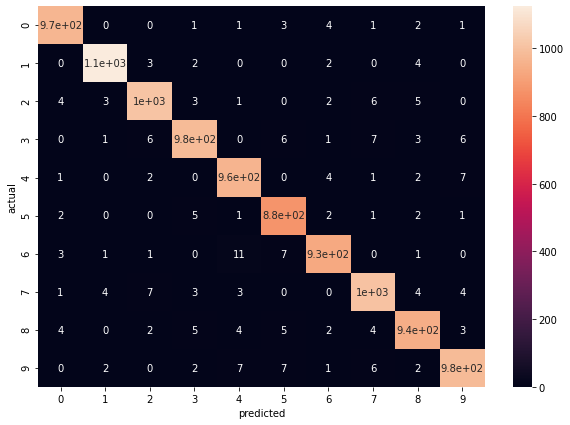

In [19]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [21]:
# model.save('model.model.h5')

INFO:tensorflow:Assets written to: model.tf\assets
